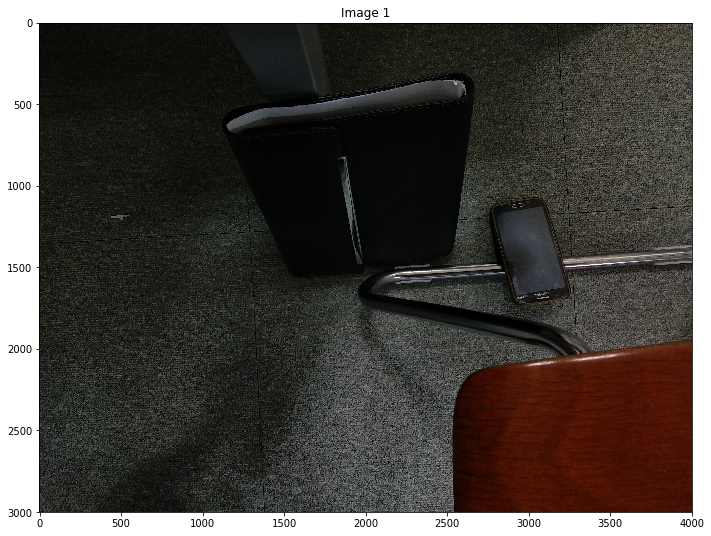

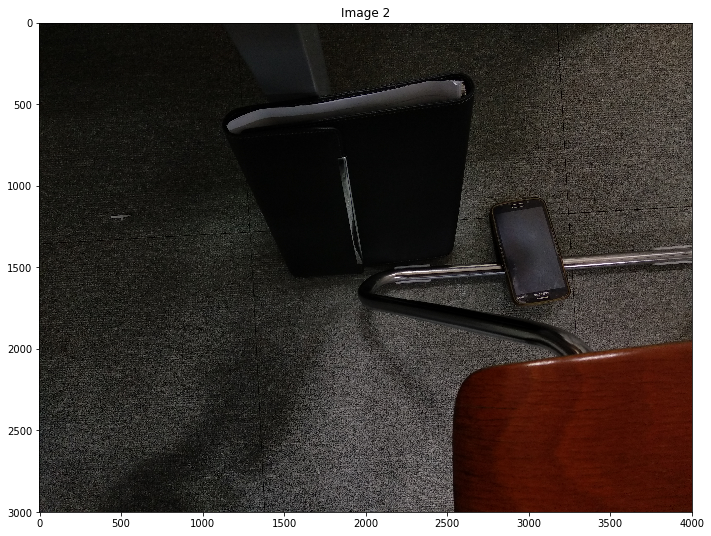

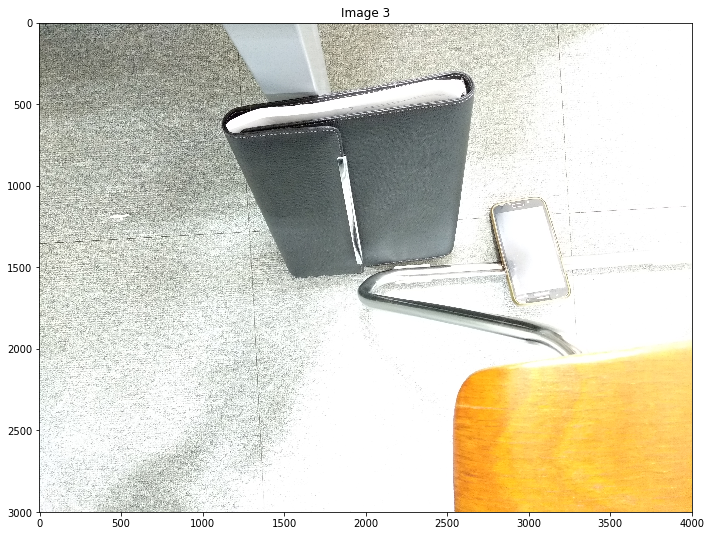

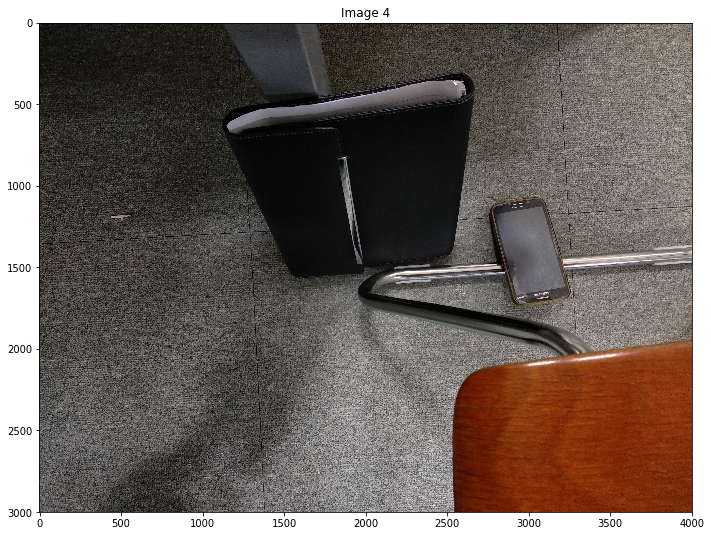

In [2]:
from PIL import Image
from matplotlib import pyplot as plt
import cv2
import numpy as np

# Loading exposure images into a list
img_fn = ["img0.jpg", "img1.jpg", "img2.jpg", "img3.jpg"]
img_list = [cv2.imread(fn) for fn in img_fn]
exposure_times = np.array([1/24, 1/24, 1/12, 1/20], dtype=np.float32)

# Show original image
for s in range(len(img_list)):
    plt.rcParams['figure.figsize'] = (16,9)
    plt.imshow(cv2.cvtColor(img_list[s], cv2.COLOR_BGR2RGB))
    plt.title('Image ' + str(s+1))
    plt.show()
    
# Align input images
alignMTB = cv2.createAlignMTB()
alignMTB.process(img_list, img_list)

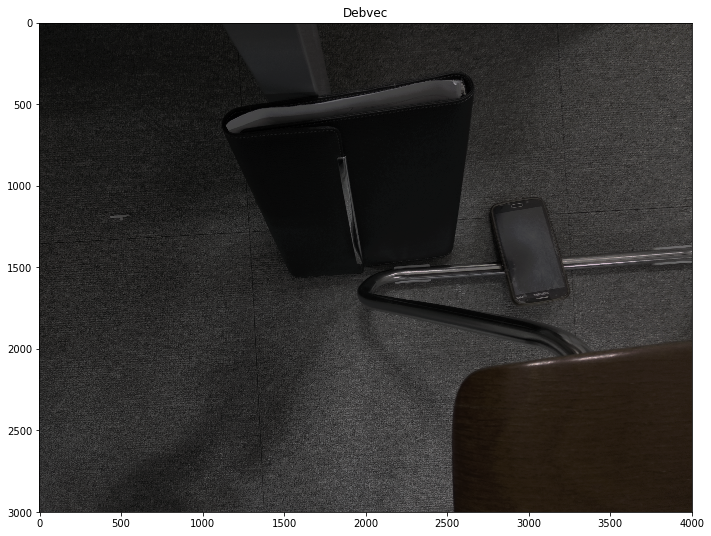

In [12]:
    # Constructing HDR Image Usig Debvec Method #

# Estimate camera response function (CRF)
cal_debvec = cv2.createCalibrateDebevec()
crf_debvec = cal_debvec.process(img_list, times=exposure_times)

# Merge exposures to HDR image
merge_debvec = cv2.createMergeDebevec()
hdr_debvec = merge_debvec.process(img_list, times=exposure_times.copy(), response=crf_debvec.copy())

# Tonemap HDR image
tonemap1 = cv2.createTonemapDurand(1.5,10,1.0,1.0,1.0)
res_debvec = tonemap1.process(hdr_debvec.copy())

# Convert datatype to 8-bit
res_debvec_8bit = np.clip(res_debvec*255, 0, 255).astype('uint8')

# Show Result
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(res_debvec_8bit, cv2.COLOR_BGR2RGB))
plt.title("Debvec")
plt.show()

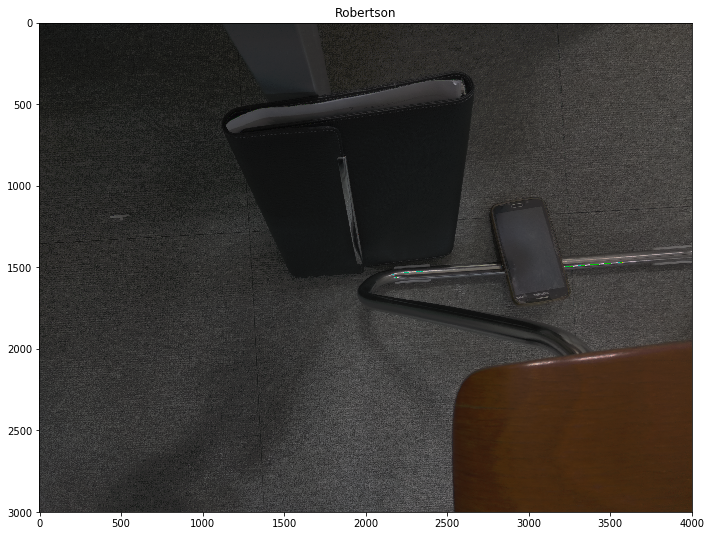

In [9]:
    # Constructing HDR Image Usig Robertson Method #
    
# Estimate camera response function (CRF)
cal_robertson = cv2.createCalibrateRobertson()
crf_robertson = cal_robertson.process(img_list, times=exposure_times)

# Merge exposures to HDR image
merge_robertson = cv2.createMergeRobertson()
hdr_robertson = merge_robertson.process(img_list, times=exposure_times.copy(), response=crf_robertson.copy())

# Tonemap HDR image
tonemap2 = cv2.createTonemapDurand(0.5,9,1.0,1.0,1.0)
res_robertson = tonemap2.process(hdr_robertson.copy())

# Convert datatype to 8-bit
res_robertson_8bit = np.clip(res_robertson*255, 0, 255).astype('uint8')

# Show Result
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(res_robertson_8bit, cv2.COLOR_BGR2RGB))
plt.title("Robertson")
plt.show()

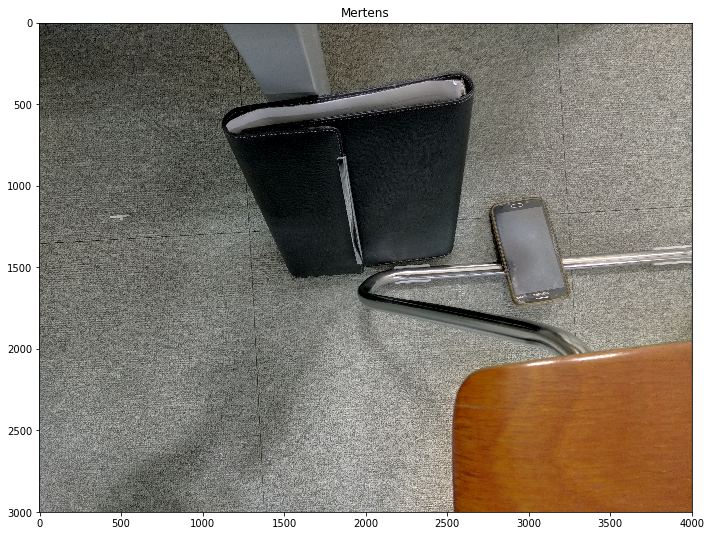

In [5]:
 # Constructing HDR Image Usig Mertens Method #

# Exposure fusion using Mertens
merge_mertens = cv2.createMergeMertens()
res_mertens = merge_mertens.process(img_list)

# Convert datatype to 8-bit
res_mertens_8bit = np.clip(res_mertens*255, 0, 255).astype('uint8')

# Show Result
plt.rcParams['figure.figsize'] = (16,9)
plt.imshow(cv2.cvtColor(res_mertens_8bit, cv2.COLOR_BGR2RGB))
plt.title("Mertens")
plt.show()